## Analysis of socioeconomic data of students from Grupo-PróEstudar 2019

###### This is a real project in progress in order to study the correlation between the students' performance of the test for enrolling in a preparatory course offered by a  volunteer organization and their socioeconomic data. That course has the goal of preparing students for the college entrance exam in Brazil.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.listdir()

['.ipynb_checkpoints',
 'Análise inscritos 2019.twb',
 'Data GPE2019 Analysis - Draft.ipynb',
 'Desempenho X Cultura (final).xlsx',
 'DesempenhoXEscola-15n.MPJ',
 'DesempenhoXEscola-15n.MPJ.BAK',
 'DesempenhoXEscola-20n.MPJ',
 'DesempenhoXEscola-20n.MPJ.BAK',
 'DesempenhoXEscola.MPJ',
 'DesempenhoXEscola.MPJ.BAK',
 'DesempenhoXFatores - Vestibulinho 2019 - Part 1.MPJ',
 'DesempenhoXFatores - Vestibulinho 2019 - Part 1.MPJ.BAK',
 'DesempenhoXFatores - VT2019 - Part 2.MPJ',
 'DesempenhoXFatores - VT2019 - Part 2.MPJ.BAK',
 'DesempenhoXLeitura - 20n (4 Lv.).MPJ',
 'DesempenhoXLeitura - 20n (4 Lv.).MPJ.BAK',
 'DesempenhoXLeitura -75 n.MPJ',
 'DesempenhoXLeitura -75 n.MPJ.BAK',
 'DesempenhoXleitura.MPJ.BAK',
 'DesempenhoXRenda - 20n.MPJ',
 'DesempenhoXRenda - 20n.MPJ.BAK',
 '~$Desempenho X Cultura (final).xlsx',
 '~DesempenhoXLeitura - 20n (4 Lv.).MPJ~']

In [2]:
survey = pd.ExcelFile("Desempenho X Cultura (final).xlsx").parse("DesempenhoXFatores")
survey.head()


,Nome,Categoria,Acertos,Acertos ( %),Escola_Ensino_Médio,Cor_Raça,Qual_renda_média _mensal_família,Quantos_livros_média_le_ano,frequência_teatro_cinema,Você_costuma _visitar _museus,"Você possui um espaço próprio e exclusivo (por exemplo, seu quarto) para se dedicar aos estudos?",Leitura Anual
0,Adinan Augusto Peres Canossa,P2,17,0.226667,José Inocêncio da Costa,Branca,"Entre R$ 2000,00 e R$ 3000,00",1 a 2,3 a 4 vezes por mês,Não tenho esse costume,Sim,Menos de 2
1,ADRIELI ALEIXO RIBEIRO,P1,26,0.346667,Henrique Morato,Parda,"Entre R$ 1000,00 e R$ 2000,00",3 a 4,Menos que 1 vez por mês,Não tenho esse costume,Sim,Mais de 2
2,Adrielly Fernanda Buzeti,P1,21,0.280000,Jardim Buscardi,Parda,"Entre R$ 2000,00 e R$ 3000,00",3 a 4,Menos que 1 vez por mês,Vou 1 vez por ano,Sim,Mais de 2
3,Alan Neves de Melo,P1,48,0.640000,Adelino Bordignon,Branca,"Entre R$ 3000,00 e R$ 4000,00",3 a 4,Menos que 1 vez por mês,Conheço ou visitei museus apenas por excursões...,Sim,Mais de 2
4,Aline Haints Pastreli,P1,35,0.466667,Adelino Bordignon,Branca,"Entre R$ 2000,00 e R$ 3000,00",Mais do que 4,1 a 2 vezes por mês,Não tenho esse costume,Sim,Mais de 2


### Cleaning and Transforming Data

In [3]:
Nullvalues = survey.isnull()
True in Nullvalues
# We can conclude we don't have Nan(not a number) and None values in the dataset

False

In [4]:
survey.columns

Index(['Nome', 'Categoria', 'Acertos', 'Acertos ( %)', 'Escola_Ensino_Médio',
       'Cor_Raça', 'Qual_renda_média _mensal_família',
       'Quantos_livros_média_le_ano', 'frequência_teatro_cinema',
       'Você_costuma _visitar _museus',
       'Você possui um espaço próprio e exclusivo (por exemplo, seu quarto) para se dedicar aos estudos?',
       'Leitura Anual'],
      dtype='object')

In [5]:
survey.rename(columns = {'Acertos ( %)': "Acertos (%)", 'Escola_Ensino_Médio': "Escola", 'Qual_renda_média _mensal_família': "Renda Média(Mês)",
                        'Quantos_livros_média_le_ano': 'Leitura Anual (1 a 2)', 'Você_costuma _visitar _museus': "Visita em Museus",
                        'Você possui um espaço próprio e exclusivo (por exemplo, seu quarto) para se dedicar aos estudos?': "Espaço ind. estudo"},
                         inplace = True)
survey["Acertos (%)"] *= 100
survey.head()

,Nome,Categoria,Acertos,Acertos (%),Escola,Cor_Raça,Renda Média(Mês),Leitura Anual (1 a 2),frequência_teatro_cinema,Visita em Museus,Espaço ind. estudo,Leitura Anual
0,Adinan Augusto Peres Canossa,P2,17,22.666667,José Inocêncio da Costa,Branca,"Entre R$ 2000,00 e R$ 3000,00",1 a 2,3 a 4 vezes por mês,Não tenho esse costume,Sim,Menos de 2
1,ADRIELI ALEIXO RIBEIRO,P1,26,34.666667,Henrique Morato,Parda,"Entre R$ 1000,00 e R$ 2000,00",3 a 4,Menos que 1 vez por mês,Não tenho esse costume,Sim,Mais de 2
2,Adrielly Fernanda Buzeti,P1,21,28.000000,Jardim Buscardi,Parda,"Entre R$ 2000,00 e R$ 3000,00",3 a 4,Menos que 1 vez por mês,Vou 1 vez por ano,Sim,Mais de 2
3,Alan Neves de Melo,P1,48,64.000000,Adelino Bordignon,Branca,"Entre R$ 3000,00 e R$ 4000,00",3 a 4,Menos que 1 vez por mês,Conheço ou visitei museus apenas por excursões...,Sim,Mais de 2
4,Aline Haints Pastreli,P1,35,46.666667,Adelino Bordignon,Branca,"Entre R$ 2000,00 e R$ 3000,00",Mais do que 4,1 a 2 vezes por mês,Não tenho esse costume,Sim,Mais de 2


### Sorting and Indexing Data Frames Properly

In [6]:
survey = survey.sort_values("Escola", ascending = True).set_index(["Escola", "Nome"]).sort_index(ascending = True)
survey.head()

Categoria  Acertos  Acertos (%)  \
Escola            Nome                                                          
Adelino Bordignon Alan Neves de Melo                 P1       48    64.000000   
                  Aline Haints Pastreli              P1       35    46.666667   
                  Ana Clara Custódio da Cunha        P1       34    45.333333   
                  Beatriz Bombonato da Silva         P1       50    66.666667   
                  Beatriz Santana de Oliveira        P1       39    52.000000   

                                              Cor_Raça  \
Escola            Nome                                   
Adelino Bordignon Alan Neves de Melo            Branca   
                  Aline Haints Pastreli         Branca   
                  Ana Clara Custódio da Cunha   Branca   
                  Beatriz Bombonato da Silva    Branca   
                  Beatriz Santana de Oliveira   Branca   

                                                            Renda Média(Mês)  \
Escola            Nome                                                         
Adelino Bordignon Alan Neves de Melo           Entre R$ 3000,00 e R$ 4000,00   
                  Aline Haints Pastreli        Entre R$ 2000,00 e R$ 3000,00   
                  Ana Clara Custódio da Cunha  Entre R$ 4000,00 e R$ 5000,00   
                  Beatriz Bombonato da Silva   Entre R$ 3000,00 e R$ 4000,00   
                  Beatriz Santana de Oliveira  Entre R$ 4000,00 e R$ 5000,00   

                                              Leitura Anual (1 a 2)  \
Escola            Nome                                                
Adelino Bordignon Alan Neves de Melo                          3 a 4   
                  Aline Haints Pastreli               Mais do que 4   
                  Ana Clara Custódio da Cunha                 1 a 2   
                  Beatriz Bombonato da Silva          Mais do que 4   
                  Beatriz Santana de Oliveira            Menos de 1   

                                              frequência_teatro_cinema  \
Escola            Nome                                                   
Adelino Bordignon Alan Neves de Melo           Menos que 1 vez por mês   
                  Aline Haints Pastreli            1 a 2 vezes por mês   
                  Ana Clara Custódio da Cunha  Menos que 1 vez por mês   
                  Beatriz Bombonato da Silva   Menos que 1 vez por mês   
                  Beatriz Santana de Oliveira  Menos que 1 vez por mês   

                                                                                Visita em Museus  \
Escola            Nome                                                                             
Adelino Bordignon Alan Neves de Melo           Conheço ou visitei museus apenas por excursões...   
                  Aline Haints Pastreli                                   Não tenho esse costume   
                  Ana Clara Custódio da Cunha                             Não tenho esse costume   
                  Beatriz Bombonato da Silva                              Não tenho esse costume   
                  Beatriz Santana de Oliveira  Conheço ou visitei museus apenas por excursões...   

                                              Espaço ind. estudo Leitura Anual  
Escola            Nome                                                          
Adelino Bordignon Alan Neves de Melo                         Sim     Mais de 2  
                  Aline Haints Pastreli                      Sim     Mais de 2  
                  Ana Clara Custódio da Cunha                Não    Menos de 2  
                  Beatriz Bombonato da Silva                 Sim     Mais de 2  
                  Beatriz Santana de Oliveira                Sim    Menos de 2

## Statistical Analysis

### Correlation between Schooll and Performance

#### Figuring Out  Descriptive Statistic Values

In [7]:
destat = survey.groupby("Escola")["Acertos (%)"].agg({"Size (N)": np.count_nonzero, "Min": np.min,
                                                     "Max": np.max, "Average": np.mean, "St. Dev.": np.std})
destat

C:\Users\Rodolfo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,Size (N),Min,Max,Average,St. Dev.
Escola,,,,,
Adelino Bordignon,55.0,28.000000,80.000000,53.163636,13.028755
Chlorita de Oliveira Penteado Martins,13.0,17.333333,50.666667,31.384615,8.736732
Dorival de Carvalho,1.0,24.000000,24.000000,24.000000,NaN
Henrique Morato,6.0,24.000000,40.000000,33.333333,7.495184
IFSP,31.0,14.666667,57.333333,37.118280,9.218961
Jardim Buscardi,23.0,20.000000,44.000000,31.710145,6.798176
José Inocêncio da Costa,19.0,21.333333,45.333333,32.842105,7.251537
Marlene Frattini,1.0,29.333333,29.333333,29.333333,NaN
Odone Belline,3.0,29.333333,34.666667,31.111111,3.079201


##### Test Normality

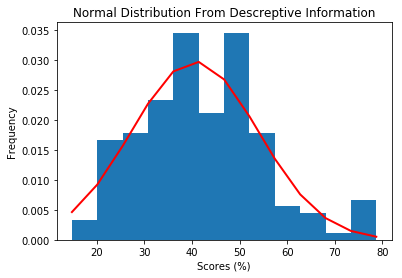

In [8]:
#Ploting normal distribution
#assumption of my data distribution is normal
mu = np.mean(survey["Acertos (%)"])
std= np.std(survey["Acertos (%)"])
N = np.count_nonzero(survey["Acertos (%)"])
distribution = np.random.normal(mu,std,N)
count, bins, ignored = plt.hist(distribution, 12, density=True)
plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * std**2) ),linewidth=2, color='r')
plt.xlabel("Scores (%)")
plt.ylabel("Frequency")
plt.title('Normal Distribution From Descreptive Information')
plt.show()


In [9]:
#Using Shapiro-Wilk test to evaluate my data population in order to figure out whether or not my sample data proceeds
#a Gaussian distribution
stat,p = stats.shapiro(survey["Acertos (%)"]) 
alpha = 0.05
if  p < alpha:
    print("p-value {} and test statistic {}. The data dont'n follow a Gaussian distribution".format(p, stat))
if p > alpha:
    print("p-value {} and test statistic {}. I can't conclude the data do not follow a Gaussian shape".format(p,stat))

p-value 6.0642223616014235e-06 and test statistic 0.9468953013420105. The data dont'n follow a Gaussian distribution


If my dataset don't follow a normal distribution, them I've less tools suitable to evaluate the correlation between 'Acertos (%)' and 'Escola'. I must probabily use nonparametric tests but before discuss about that let's visualize the distribution of our data related to Schools.

In [10]:
survey = survey.reset_index()
dataset = survey.loc[:,["Escola", "Acertos (%)"]]
dataset.head()

,Escola,Acertos (%)
0,Adelino Bordignon,64.000000
1,Adelino Bordignon,46.666667
2,Adelino Bordignon,45.333333
3,Adelino Bordignon,66.666667
4,Adelino Bordignon,52.000000


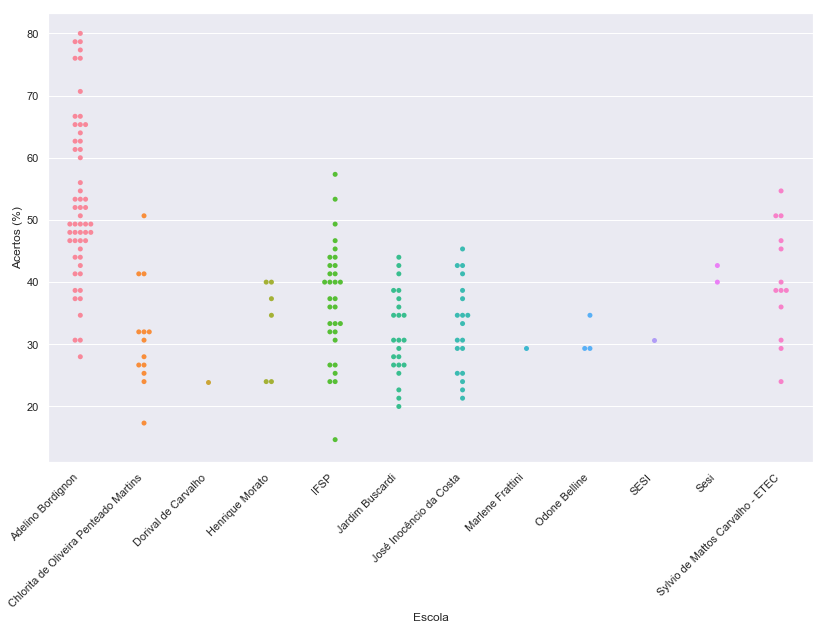

In [11]:
import seaborn as sns
sns.set(style = "ticks", color_codes = True)
sns.set(rc={'figure.figsize':(13.7,8.27)})
chart = sns.swarmplot(x = "Escola", y = "Acertos (%)", data = dataset)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = "right");

#### One-Way Anova Analysis

When it comes to dataset requirements to use the ANOVA analysis, the support website of  Minitab says that even though the sample is not from a normal population, we can use the one-way ANOVA in case that each sample group is greater than 15 or 20. The test performs very well with skewed and nonnormal distribution, on the other hand, it's not all group that has a sample greater than 15 or 20 but,  even so, the ANOVA test allows using different group sizes.
Let's pick up randomly 16  N from the six largest groups in which two will have 13 N owing to they don't have data enough. Keep in mind groups less than 20 or 15 can result in misleading conclusions with nonnormal distribution, so let's use One way-ANOVA carefully just for studying.
Resourses: https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/anova/how-to/one-way-anova/before-you-start/data-considerations/

In [12]:
sixlargest = []
for label,value in destat["Size (N)"].nlargest(6).iteritems():
    sixlargest.append(label)
print(sixlargest)

['Adelino Bordignon', 'IFSP', 'Jardim Buscardi', 'José Inocêncio da Costa', 'Chlorita de Oliveira Penteado Martins', 'Sylvio de Mattos Carvalho - ETEC']


In [13]:
#reindexing and queriyng our data frame
survey = survey.sort_values( "Escola", ascending =True).set_index(["Escola", "Nome"]).sort_index(ascending = True)
survey = survey.loc[sixlargest]
survey

Categoria  \
Escola                           Nome                                           
Adelino Bordignon                Alan Neves de Melo                        P1   
                                 Aline Haints Pastreli                     P1   
                                 Ana Clara Custódio da Cunha               P1   
                                 Beatriz Bombonato da Silva                P1   
                                 Beatriz Santana de Oliveira               P1   
                                 Bárbara Sentanin                          P2   
                                 Christopher Wendy Belasco de Souza        P1   
                                 Felipe Scarpinati Luchetti                P1   
                                 Francisco Biazoni Albaricci               P2   
                                 Gabriel Alexander Toledo Mendes           P1   
                                 Gabriel Brito de Souza                    P1   
                                 Gabriel Cavichioli Gazoli                 P2   
                                 Gabriel Irruan Rota                       P1   
                                 Gabriela Balarini Freire                  P2   
                                 Isadora Beretella Marczuk                 P2   
                                 José Moraes Neto                          P1   
                                 João Pedro Vieira Rodrigues               P2   
                                 Julia Correia Chagas                      P1   
                                 Julia Rafaela Urbano dos Santos           P1   
                                 Julia Teresa Ferreira                     P1   
                                 Júlia Gabriela Bueno de Alvarenga         P1   
                                 LETÍCIA BUSSOLA MANCINI                   P1   
                                 LUCAS HENRIQUE DA SILVA                   P1   
                                 Laís Alessandra Lacerda                   P2   
                                 Leonardo Cardoso da Silva                 P1   
                                 Leticia Cristina Formici                  P1   
                                 Lucas Malachias Vieira                    P2   
                                 Lucas Marques Mazzoni                     P2   
                                 Maria Julia Leite Ferreira                P1   
                                 Maria Luísa Basilio Tieni                 P2   
...                                                                       ...   
José Inocêncio da Costa          Gilmara Marques Azevedo                   P2   
                                 Jessica Gomes Lunardi                     P1   
                                 João Augusto Mingóia                      P2   
                                 Julia Gabriela Delfino                    P1   
                                 Júlia Beatriz Da Silva Vicente            P1   
                                 Kethellen Kelmi dos santos silva          P1   
                                 Leticia Vitória Avanso                    P2   
                                 Luana Beatriz dos Santos                  P2   
                                 Luana Caroline Martins Coelho             P1   
                                 Luana Felisberto de Moura Lopes           P1   
                                 Maria Aline Soares dos Santos             P1   
                                 Maria Leticia Vieira Priosti              P2   
                                 Maria fernanda silva                      P1   
                                 Maísa Caetano                             P1   
                                 Milena da Silva Ferreira                  P1   
                                 Paulo Henrique da Silva Rocha             P2   
                                 Paulo Ricardo Gonçalves Machado           P1   
Sylvio de Mattos C

In [14]:
#confirming the len of my data fram
np.sum(destat["Size (N)"].loc[sixlargest]) == len(survey)

True

In [15]:
school = list(survey.index.get_level_values("Escola").unique())
dic = {}
for index in school:
    if index == 'Sylvio de Mattos Carvalho - ETEC':
        dic.setdefault(index,list(survey.loc[index]["Acertos (%)"].sample(n = 13)) +list(np.repeat((np.nan),3)))
    if index == "Chlorita de Oliveira Penteado Martins":
        dic.setdefault(index,list(survey.loc[index]["Acertos (%)"].sample(n = 13)) +list(np.repeat((np.nan),3)))
school.remove('Sylvio de Mattos Carvalho - ETEC')
school.remove("Chlorita de Oliveira Penteado Martins")
for index in school:
        dic.setdefault(index,list(survey.loc[index]["Acertos (%)"].sample(n = 16)))
Samples = pd.DataFrame(dic)
Samples

        


,Chlorita de Oliveira Penteado Martins,Sylvio de Mattos Carvalho - ETEC,Adelino Bordignon,IFSP,Jardim Buscardi,José Inocêncio da Costa
0,41.333333,40.000000,60.000000,40.000000,37.333333,24.000000
1,32.000000,24.000000,62.666667,46.666667,28.000000,34.666667
2,32.000000,46.666667,38.666667,44.000000,30.666667,25.333333
3,50.666667,29.333333,53.333333,37.333333,29.333333,30.666667
4,41.333333,50.666667,37.333333,32.000000,38.666667,42.666667
5,25.333333,30.666667,52.000000,45.333333,36.000000,21.333333
6,17.333333,45.333333,48.000000,36.000000,22.666667,22.666667
7,24.000000,38.666667,77.333333,57.333333,34.666667,34.666667
8,26.666667,54.666667,46.666667,53.333333,25.333333,33.333333
9,28.000000,50.666667,70.666667,26.666667,30.666667,30.666667


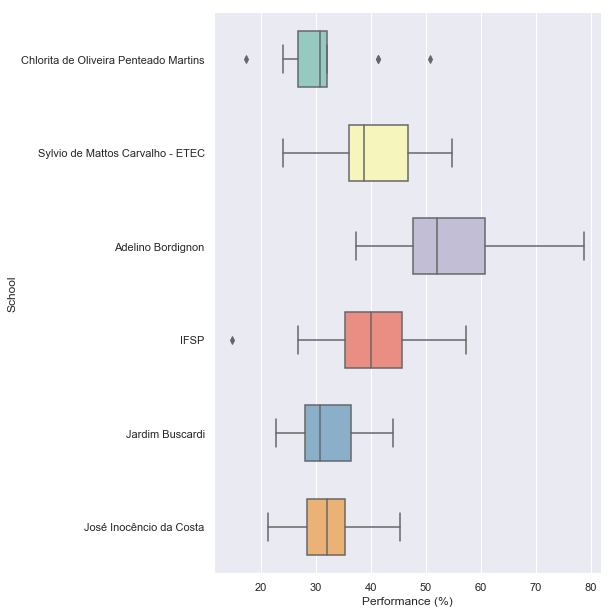

In [16]:
#ploting a box-splot chart
box = sns.catplot(kind = "box", data = Samples, palette = "Set3", orient = "h", width = 0.6, height = 8.5)
box.set(xlabel = "Performance (%)", ylabel = "School");



In [17]:
Samples.columns

Index(['Chlorita de Oliveira Penteado Martins',
       'Sylvio de Mattos Carvalho - ETEC', 'Adelino Bordignon', 'IFSP',
       'Jardim Buscardi', 'José Inocêncio da Costa'],
      dtype='object')

In [18]:
#One-Way ANOVA
F,p = stats.f_oneway(Samples.iloc[0:13]['Chlorita de Oliveira Penteado Martins'],
               Samples.iloc[0:13]['Sylvio de Mattos Carvalho - ETEC'],
              Samples['Adelino Bordignon'], Samples['Jardim Buscardi'], Samples["José Inocêncio da Costa"], Samples["IFSP"])
alpha = 0.05
if p < alpha:
    print("F = {}, p-value = {}. I reject null hypothesis Ho. At least one popullation mean is different from others".format(F,p))
if p > alpha:
     print("F = {}, p-value = {}. I don't have enough evidence to reject  null hypothesisHo. All population means are statistically equal".format(F,p))
    

F = 14.409342057232653, p-value = 3.527246403104128e-10. I reject null hypothesis Ho. At least one popullation mean is different from others


#### Kruskal Test

It's important to use Kruskal Test to analyze different group means when data considerations for One-way ANOVA were not met even if the power test is lower 

In [19]:
F,p = stats.kruskal(Samples.iloc[0:13]['Chlorita de Oliveira Penteado Martins'],
               Samples.iloc[0:13]['Sylvio de Mattos Carvalho - ETEC'],
              Samples['Adelino Bordignon'], Samples['Jardim Buscardi'], Samples["José Inocêncio da Costa"], Samples["IFSP"])
alpha = 0.05
if p < alpha:
    print("F = {}, p-value = {}. I reject null hypothesis Ho. At least one popullation mean is different of others".format(F,p))
if p > alpha:
     print("F = {}, p-value = {}. I don't have enough evidence to reject  null hypothesisHo. All population means are statistically equal".format(F,p))
    

F = 38.802397764231415, p-value = 2.6025490479919885e-07. I reject null hypothesis Ho. At least one popullation mean is different of others


#### Tukey pairwise comparison